# 수행한 것

*   con 8,9 데이터 전처리 (series_nm, supper_asset_nm)
*   score 컬럼 생성
  - count2 : subsr과 series_nm이 같을 때 클릭률
  - count_id : id별 총 클릭률
  - score : count2/count_id

*   위 항목에 subsr과 series_nm를 duplicated 해서 나머지 데이터를 합쳐놓음

## 데이터로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [3]:
# 데이터를 구분하는 문자를 지정하는 옵션
# 제목만 전처리한 항목
vod = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/모델/1. 하이브리드 모델/전처리 파일/vod_prepro_series_nm.csv')
con = pd.read_csv('/content/drive/MyDrive/LG Hellovision VOD 추천 프로젝트/모델/1. 하이브리드 모델/전처리 파일/con_prepro_series_nm.csv', encoding='cp949')

In [4]:
# 순서 및 컬럼명 변경
# 10657
vod = vod[['subsr', 'asset_nm', 'ct_cl', 'genre_of_ct_cl', 'use_tms', 'disp_rtm', 'SMRY', 'strt_dt']]
vod = vod.rename(columns = {'asset_nm' : 'series_nm', 'strt_dt' : 'log_dt'})
vod['type'] = 'watched'
vod.tail(3)

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,type
10158,66317000,알사탕,키즈,학습,3.3,8,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",20230903223210,watched
10159,66900000,월간 아기상어,키즈,학습,0.8,1,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,20230904120057,watched
10160,60169000,놀자!,키즈,학습,6.8,7,[인기작가 박정섭의 그림책] 놀고 싶은 어린이들 모두 모두 모여라! 온몸으로 뛰어놀...,20230914210135,watched


In [5]:
# 21105
con['type'] = 'click'
con.tail(3)

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,type
21126,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,click
21127,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,click
21128,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121654,click


In [6]:
ccon = con.copy()
vvod = vod.copy()

### score 생성

In [7]:
# 정렬
all = pd.concat([vvod, ccon], ignore_index = True).sort_values('log_dt')
all

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,20230801000038,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"
11500,65265000,러브 포 세일,영화,드라마,NaN,89,"내 이름은 스즈키 료코, 29세. AV 배우였다가 신문 기자를 거쳐, 지금은 도쿄대...",20230801000444,click,러브 포 세일,"시바타 치히로,코니시 키스,우치다 치카 ,토미테 아미"
13592,64399000,악마들,영화,액션/어드벤쳐,NaN,106,"서비스 해지 시까지 시청 가능. 아무런 동기도, 흔적도 없이 이어지는 연쇄살인. 살...",20230801000701,click,악마들,"장동윤,오대환,최귀화,장재호,손종학,신승환,윤병희"
18029,60067000,학려화정,TV드라마,외화 시리즈,NaN,40,황제는 태자비를 죽인 게 조 귀비인 걸 알지만 태자를 견제하기 위해 육문석에게 누명...,20230801002922,click,학려화정,"라진,이일동"
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,40,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,20230801002938,watched,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,TV드라마,기타,0.0,64,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...",20230930234119,watched,NaN,NaN
7491,64154000,최강 배달꾼,TV드라마,기타,0.0,56,강수는 배달전문 회사 최강배달꾼의 가맹점을 늘리기 위해 배달부들과 함께 먹자골목을 ...,20230930235126,watched,NaN,NaN
23690,64984000,각시탈,TV드라마,기타,NaN,63,콘노국장의 명령마저 무시한 채 담사리의 공개처형을 진행하는 기무라. 강토는 기무라가...,20230930235619,click,각시탈,"주원,진세연,박기웅,한채아"
7166,64984000,각시탈,TV드라마,기타,0.0,64,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,20230930235702,watched,NaN,NaN


In [8]:
# Assuming df is your DataFrame
all['log_dt'] = pd.to_datetime(all['log_dt'], format='%Y%m%d%H%M%S')

all

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,2023-08-01 00:00:38,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"
11500,65265000,러브 포 세일,영화,드라마,NaN,89,"내 이름은 스즈키 료코, 29세. AV 배우였다가 신문 기자를 거쳐, 지금은 도쿄대...",2023-08-01 00:04:44,click,러브 포 세일,"시바타 치히로,코니시 키스,우치다 치카 ,토미테 아미"
13592,64399000,악마들,영화,액션/어드벤쳐,NaN,106,"서비스 해지 시까지 시청 가능. 아무런 동기도, 흔적도 없이 이어지는 연쇄살인. 살...",2023-08-01 00:07:01,click,악마들,"장동윤,오대환,최귀화,장재호,손종학,신승환,윤병희"
18029,60067000,학려화정,TV드라마,외화 시리즈,NaN,40,황제는 태자비를 죽인 게 조 귀비인 걸 알지만 태자를 견제하기 위해 육문석에게 누명...,2023-08-01 00:29:22,click,학려화정,"라진,이일동"
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,40,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,2023-08-01 00:29:38,watched,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,TV드라마,기타,0.0,64,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...",2023-09-30 23:41:19,watched,NaN,NaN
7491,64154000,최강 배달꾼,TV드라마,기타,0.0,56,강수는 배달전문 회사 최강배달꾼의 가맹점을 늘리기 위해 배달부들과 함께 먹자골목을 ...,2023-09-30 23:51:26,watched,NaN,NaN
23690,64984000,각시탈,TV드라마,기타,NaN,63,콘노국장의 명령마저 무시한 채 담사리의 공개처형을 진행하는 기무라. 강토는 기무라가...,2023-09-30 23:56:19,click,각시탈,"주원,진세연,박기웅,한채아"
7166,64984000,각시탈,TV드라마,기타,0.0,64,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,2023-09-30 23:57:02,watched,NaN,NaN


In [9]:
data1 = all[['subsr', 'series_nm', 'log_dt']]
data1 = data1.drop_duplicates()
data1

,subsr,series_nm,log_dt
16631,60224000,아씨두리안,2023-08-01 00:00:38
11500,65265000,러브 포 세일,2023-08-01 00:04:44
13592,64399000,악마들,2023-08-01 00:07:01
18029,60067000,학려화정,2023-08-01 00:29:22
3580,60067000,학려화정,2023-08-01 00:29:38
...,...,...,...
7618,64130000,효심이네 각자도생,2023-09-30 23:41:19
7491,64154000,최강 배달꾼,2023-09-30 23:51:26
23690,64984000,각시탈,2023-09-30 23:56:19
7166,64984000,각시탈,2023-09-30 23:57:02


In [10]:
data2 = all[['subsr', 'series_nm', 'type', 'log_dt']]
data2

,subsr,series_nm,type,log_dt
16631,60224000,아씨두리안,click,2023-08-01 00:00:38
11500,65265000,러브 포 세일,click,2023-08-01 00:04:44
13592,64399000,악마들,click,2023-08-01 00:07:01
18029,60067000,학려화정,click,2023-08-01 00:29:22
3580,60067000,학려화정,watched,2023-08-01 00:29:38
...,...,...,...,...
7618,64130000,효심이네 각자도생,watched,2023-09-30 23:41:19
7491,64154000,최강 배달꾼,watched,2023-09-30 23:51:26
23690,64984000,각시탈,click,2023-09-30 23:56:19
7166,64984000,각시탈,watched,2023-09-30 23:57:02


In [11]:
data2_count = data2.groupby(['subsr', 'series_nm']).agg({'log_dt': 'count'}).reset_index()
data2_count.columns = ['subsr', 'series_nm', 'Affinity']
data2_count

,subsr,series_nm,Affinity
0,59879000,나쁜엄마,1
1,59879000,나의 해방일지,1
2,59879000,낭만닥터 김사부2,1
3,59879000,소방서 옆 경찰서,5
4,59879000,슬기로운 의사생활 시즌2,1
...,...,...,...
7706,67160000,심야괴담회,1
7707,67160000,콘크리트 유토피아,1
7708,67161000,스파이 코드명 포춘,4
7709,67164000,미션 임파서블: 데드 레코닝 PART ONE,2


In [12]:
# Add column of weights
data2_w = data2.copy()

conditions = [
    data2_w['type'] == 'click',
    data2_w['type'] == 'watched'
]

choices = [1, 2]

data2_w['Weight'] = np.select(conditions, choices, default='0')

# Convert to numeric type.
data2_w['Weight'] = pd.to_numeric(data2_w['Weight'])
data2_w

,subsr,series_nm,type,log_dt,Weight
16631,60224000,아씨두리안,click,2023-08-01 00:00:38,1
11500,65265000,러브 포 세일,click,2023-08-01 00:04:44,1
13592,64399000,악마들,click,2023-08-01 00:07:01,1
18029,60067000,학려화정,click,2023-08-01 00:29:22,1
3580,60067000,학려화정,watched,2023-08-01 00:29:38,2
...,...,...,...,...,...
7618,64130000,효심이네 각자도생,watched,2023-09-30 23:41:19,2
7491,64154000,최강 배달꾼,watched,2023-09-30 23:51:26,2
23690,64984000,각시탈,click,2023-09-30 23:56:19,1
7166,64984000,각시탈,watched,2023-09-30 23:57:02,2


In [13]:
# Do count with weight
# 동일 프로그램명 X
data2_wcount = data2_w.groupby(['subsr', 'series_nm'])['Weight'].sum().reset_index()
data2_wcount.columns = ['subsr', 'series_nm', 'Affinity']
data2_wcount

,subsr,series_nm,Affinity
0,59879000,나쁜엄마,1
1,59879000,나의 해방일지,1
2,59879000,낭만닥터 김사부2,1
3,59879000,소방서 옆 경찰서,7
4,59879000,슬기로운 의사생활 시즌2,1
...,...,...,...
7706,67160000,심야괴담회,1
7707,67160000,콘크리트 유토피아,1
7708,67161000,스파이 코드명 포춘,5
7709,67164000,미션 임파서블: 데드 레코닝 PART ONE,2


In [14]:
T = 30

t_ref = pd.to_datetime(data2_w['log_dt'], "").max()

In [15]:
t_ref

Timestamp('2023-09-30 23:57:36')

In [16]:
# Calculate the weighted count with time decay

data2_w['Timedecay'] = data2_w.apply(
    lambda x: x['Weight'] * np.power(0.5, (t_ref - pd.to_datetime(x['log_dt'])).days / T),
    axis=1
)
data2_w

,subsr,series_nm,type,log_dt,Weight,Timedecay
16631,60224000,아씨두리안,click,2023-08-01 00:00:38,1,0.25
11500,65265000,러브 포 세일,click,2023-08-01 00:04:44,1,0.25
13592,64399000,악마들,click,2023-08-01 00:07:01,1,0.25
18029,60067000,학려화정,click,2023-08-01 00:29:22,1,0.25
3580,60067000,학려화정,watched,2023-08-01 00:29:38,2,0.50
...,...,...,...,...,...,...
7618,64130000,효심이네 각자도생,watched,2023-09-30 23:41:19,2,2.00
7491,64154000,최강 배달꾼,watched,2023-09-30 23:51:26,2,2.00
23690,64984000,각시탈,click,2023-09-30 23:56:19,1,1.00
7166,64984000,각시탈,watched,2023-09-30 23:57:02,2,2.00


In [17]:
data2_wt = data2_w.groupby(['subsr', 'series_nm'])['Timedecay'].sum().reset_index()
data2_wt.columns = ['subsr', 'series_nm', 'Affinity']
ACscore_data = data2_wt

ACscore_data

,subsr,series_nm,Affinity
0,59879000,나쁜엄마,0.250000
1,59879000,나의 해방일지,0.250000
2,59879000,낭만닥터 김사부2,0.250000
3,59879000,소방서 옆 경찰서,1.750000
4,59879000,슬기로운 의사생활 시즌2,0.250000
...,...,...,...
7706,67160000,심야괴담회,0.793701
7707,67160000,콘크리트 유토피아,0.870551
7708,67161000,스파이 코드명 포춘,4.061262
7709,67164000,미션 임파서블: 데드 레코닝 PART ONE,1.909683


In [18]:
ACscore_data[(ACscore_data["series_nm"] == "밀수") & (ACscore_data['subsr'] == 67164000)]

,subsr,series_nm,Affinity
7710,67164000,밀수,9.615371


In [19]:
a = all.drop_duplicates(subset = ['subsr', 'series_nm'])
a.head(1)

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,type,super_asset_nm,ACTR_DISP
16631,60224000,아씨두리안,TV드라마,기타,NaN,65,클럽에서 만난 도이와 주남은 다시 만나기로 약속한다. 과거 김 씨 부인은 리안에게 ...,2023-08-01 00:00:38,click,아씨두리안,"박주미,최명길,김민준,한다감,전노민,윤해영,지영산,유정후,이다연,김채은,황미나"


In [20]:
a[(a["series_nm"] == "밀수") & (a['subsr'] == 67164000)]

,subsr,series_nm,ct_cl,genre_of_ct_cl,use_tms,disp_rtm,SMRY,log_dt,type,super_asset_nm,ACTR_DISP
30701,67164000,밀수,영화,액션/어드벤쳐,NaN,0,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,2023-09-28 17:29:01,click,밀수,"김혜수,염정아,조인성,박정민,김종수,고민시"


In [21]:
score = ACscore_data.merge(a, on = ['subsr', 'series_nm'], how = 'left')
c_score = score[['subsr', 'series_nm', 'Affinity', 'ct_cl', 'genre_of_ct_cl']]
c_score

,subsr,series_nm,Affinity,ct_cl,genre_of_ct_cl
0,59879000,나쁜엄마,0.250000,TV드라마,기타
1,59879000,나의 해방일지,0.250000,TV드라마,기타
2,59879000,낭만닥터 김사부2,0.250000,TV드라마,기타
3,59879000,소방서 옆 경찰서,1.750000,TV드라마,기타
4,59879000,슬기로운 의사생활 시즌2,0.250000,TV드라마,기타
...,...,...,...,...,...
7706,67160000,심야괴담회,0.793701,TV 연예/오락,기타
7707,67160000,콘크리트 유토피아,0.870551,영화,드라마
7708,67161000,스파이 코드명 포춘,4.061262,영화,액션/어드벤쳐
7709,67164000,미션 임파서블: 데드 레코닝 PART ONE,1.909683,영화,액션/어드벤쳐


In [22]:
c_score[(c_score["series_nm"] == "밀수") & (c_score['subsr'] == 67164000)]

,subsr,series_nm,Affinity,ct_cl,genre_of_ct_cl
7710,67164000,밀수,9.615371,영화,액션/어드벤쳐


In [23]:
c_score.to_csv('c_score.csv', index=False, encoding='cp949')

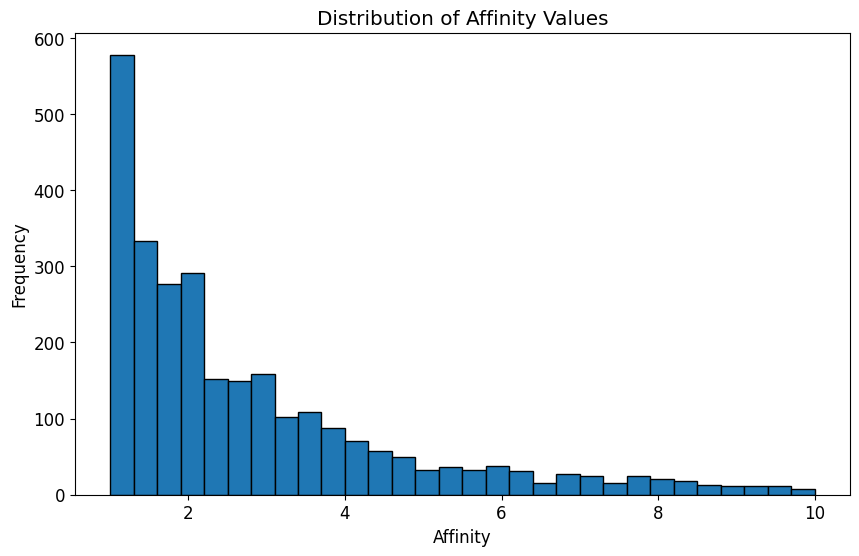

In [24]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(ACscore_data['Affinity'], bins=30, range=(1, 10), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()